# Librairies

In [ ]:
!pip install tensorflow==2.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 18 kB/s 
     |████████████████████████████████| 462 kB 10.7 MB/s 
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
    Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220719082949


In [ ]:
!pip install xplique

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 123 kB 25.1 MB/s 


In [ ]:
!pip install scipy==1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.2 MB 94.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 4.1.4 requires scipy>=1.4.1, but you have scipy 1.1.0 which is incompatible.
plotnine 0.8.0 requires scipy>=1.5.0, but you have scipy 1.1.0 which is incompatible.
jaxlib 0.3.15+cuda11.cudnn805 requires scipy>=1.5, but you have scipy 1.1.0 which is incompatible.
jax 0.3.17 requires scipy>=1.5, but you have scipy 1.1.0 which is incompatible.
aeppl 0.0.33 requires scipy>=1.4.0, but you have scipy 1.1.0 which is incompatible.


In [ ]:
# Run encore si ça ce marche pas (tensorflow ne fonctionne pas du premier coup je ne sais pas pourquoi)
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os, random, shutil, time
import sklearn
import tensorflow as tf
import cv2
import h5py


from skimage import io
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D,InputLayer
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc ,confusion_matrix, classification_report
from keras.utils.vis_utils import plot_model
from keras.models import load_model

import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
from skimage import io
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

from PIL import Image, ImageOps

# MPL
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# CNN

# InceptionV3
from tensorflow.keras.applications import InceptionV3

# VGG16
from keras.applications.vgg16 import VGG16

## Attention network
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, Conv2D, multiply, LocallyConnected2D, Lambda
from keras.models import Model

tf.compat.v1.disable_eager_execution()


In [ ]:
# Hashing
import hashlib
#from scipy.misc import imread, imresize, imshow
import matplotlib.pyplot as plt
%matplotlib inline
import time
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
sns.set_palette("flare") #("husl")

# Importation modèles et fonctioncs

In [ ]:
img_size = 224

In [ ]:
def print_pred_multi(model, patient):
  pred = model.predict(patient)
  class_pred = np.argmax(pred, axis=1)

  print("Probabilités :")
  print("  Bacterial.   Normal.    Viral. ")
  print(pred)
  print("------------------------------------- ")
  print("Prédiction de la classe :")
  if class_pred == 0:
    print("Bacterial")
  elif class_pred == 1:
    print("Normal")
  else:
    print("Viral")

def print_pred_binaire(model, patient):
  pred = model.predict(patient)
  class_pred = np.argmax(pred, axis=1)

  print("Probabilités :")
  print("  Normal.         Pneumonie. ")
  print(pred)
  print("------------------------------------- ")
  print("Prédiction de la classe :")
  if class_pred == 0:
    print("Normal")
  else:
    print("Pneumonie")


def print_pred_binaire_pneu(model, patient):
  pred = model.predict(patient)
  class_pred = np.argmax(pred, axis=1)

  print("Probabilités :")
  print("  Bactérienne.     Virale. ")
  print(pred)
  print("------------------------------------- ")
  print("Prédiction de la classe :")
  if class_pred == 0:
    print("Bactérienne")
  else:
    print("Virale")

In [ ]:
# Modèles multi-classes
mlp = keras.models.load_model('/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/final_model/mlp.h5') 
cnn = keras.models.load_model('/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/final_model/cnn.h5') 
inceptionv3 = keras.models.load_model('/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/final_model/inception.h5') 
vgg16 = keras.models.load_model('/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/final_model/attention_vgg16.h5') 

# Modèles binaires Normal vs. Pneumonie
mlp_b = keras.models.load_model('/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/final_model_binary/mlp.h5') 
cnn_b = keras.models.load_model('/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/final_model_binary/cnn.h5') 
inceptionv3_b = keras.models.load_model('/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/final_model_binary/inception.h5') 
vgg16_b = keras.models.load_model('/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/final_model_binary/attention_vgg16.h5') 

# Modèles binaires Pneumonie Bactérienne vs. Virale
mlp_bp = keras.models.load_model('/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/final_model_binary_pneu/mlp.h5') 
cnn_bp = keras.models.load_model('/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/final_model_binary_pneu/cnn.h5') 
inceptionv3_bp = keras.models.load_model('/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/final_model_binary_pneu/inception.h5') 
vgg16_bp = keras.models.load_model('/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/final_model_binary_pneu/attention_vgg16.h5') 

Instructions for updating:
Colocations handled automatically by placer.


# 1er patient - Pneumonie Virale


### Données

In [ ]:
### Shape pour MLP

directory = '/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/test/PNEUMONIA/person19_virus_50.jpeg'
img_arr = cv2.imread(directory, cv2.IMREAD_GRAYSCALE) 
resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Remodeler à la taille souhaitée
patient_viral = cv2.equalizeHist(resized_arr)
patient_viral = patient_viral.reshape(-1, img_size*img_size).astype('float32')
print('patient_viral float32 shape:', patient_viral.shape)


patient_viral float32 shape: (1, 50176)


In [ ]:
### Shape pour CNN

directory = '/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/test/PNEUMONIA/person19_virus_50.jpeg'
img_arr = cv2.imread(directory, cv2.IMREAD_GRAYSCALE) 
resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Remodeler à la taille souhaitée
backtorgb = cv2.cvtColor(resized_arr,cv2.COLOR_GRAY2RGB) # Conversion en RGB
r_image, g_image, b_image = cv2.split(backtorgb) # Séparation des 3 canaux RGB
r_image_eq = cv2.equalizeHist(r_image) # égalisation d'histogramme pour augmenter le contraste
g_image_eq = cv2.equalizeHist(g_image)
b_image_eq = cv2.equalizeHist(b_image)
patient_viral = cv2.merge((r_image_eq, g_image_eq, b_image_eq)) # Assemblage des 3 canaux RGB


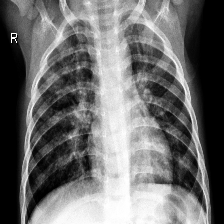

In [ ]:
# Je visualise une image pour m'assurer de la qualité
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
fig = px.imshow(patient_viral, color_continuous_scale='gray', title="Patient Pneumonie Virale")
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.show()

In [ ]:
# Normalisation 
patient_viral = np.array(patient_viral) / 255
print(f'patient_viral shape: {patient_viral.shape}')
patient_viral = patient_viral.reshape(-1,img_size,img_size,3)
print(f'patient_viral shape: {patient_viral.shape}')

patient_viral shape: (224, 224, 3)
patient_viral shape: (1, 224, 224, 3)


### Modèles Multiclasses

In [ ]:
# MLP
print("Prédiction MLP Multiclasses")
print("------------------------------------- ")
print_pred_multi(mlp, patient_viral)

Prédiction MLP Multiclasses
------------------------------------- 
Probabilités :
  Bacterial.   Normal.    Viral. 
[[0. 0. 1.]]
------------------------------------- 
Prédiction de la classe :
Viral


In [ ]:
# CNN
print("Prédiction CNN Multiclasses")
print("------------------------------------- ")
print_pred_multi(cnn, patient_viral)

Prédiction CNN Multiclasses
------------------------------------- 
Probabilités :
  Bacterial.   Normal.    Viral. 
[[0.01193608 0.02164934 0.9664146 ]]
------------------------------------- 
Prédiction de la classe :
Viral


In [ ]:
# InceptionV3
print("Prédiction InceptionV3 Multiclasses")
print("------------------------------------- ")
print_pred_multi(inceptionv3, patient_viral)

Prédiction InceptionV3 Multiclasses
------------------------------------- 
Probabilités :
  Bacterial.   Normal.    Viral. 
[[0.0620758  0.03509411 0.9028301 ]]
------------------------------------- 
Prédiction de la classe :
Viral


In [ ]:
# VGG16
print("Prédiction InceptionV3 Multiclasses")
print("------------------------------------- ")
print_pred_multi(attention_vgg16, patient_viral)

Prédiction InceptionV3 Multiclasses
------------------------------------- 
Probabilités :
  Bacterial.   Normal.    Viral. 
[[0.09396699 0.05821062 0.84782237]]
------------------------------------- 
Prédiction de la classe :
Viral


In [ ]:
# Je récupère la couche d'attention du modèle VGG16

for attn_layer in attention_vgg16.layers:
    c_shape = attn_layer.get_output_shape_at(0)
    if len(c_shape)==4:
        if c_shape[-1]==1:
            print(attn_layer)
            break

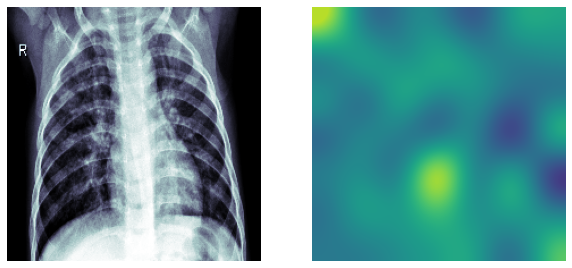

In [ ]:
# Je visualise la heat map du modèle d'attention VGG16

fig, ax = plt.subplots(1, 2, figsize = (10, 10))
[c_ax.axis('off') for c_ax in m_axs.flatten()]

attn_img = attn_func([patient_viral, 0])[0]
ax[0].imshow(patient_viral[0,:,:,0], cmap = 'bone')
ax[0].axis('off')
ax[1].imshow(attn_img[0, :, :, 0], cmap = 'viridis', 
                   vmin = 0, vmax = 1, 
                   interpolation = 'lanczos')
ax[1].axis('off')


fig.savefig('attention_map.png', dpi = 300)

### Modèles binaires

In [ ]:
# MLP
print("Prédiction MLP Binaire")
print("------------------------------------- ")
print_pred_binaire(mlp_b, patient_viral)
print("------------------------------------- ")
print("------------------------------------- ")
print_pred_binaire_pneu(mlp_bp, patient_viral)

Prédiction MLP Binaire
------------------------------------- 
Probabilités :
  Normal.         Pneumonie. 
[[0. 1.]]
------------------------------------- 
Prédiction de la classe :
Pneumonie
------------------------------------- 
------------------------------------- 
Probabilités :
  Bactérienne.     Virale. 
[[0. 1.]]
------------------------------------- 
Prédiction de la classe :
Virale


In [ ]:
# CNN
print("Prédiction CNN Binaire")
print("------------------------------------- ")
print_pred_binaire(cnn_b, patient_viral)
print("------------------------------------- ")
print("------------------------------------- ")
print_pred_binaire_pneu(cnn_bp, patient_viral)

Prédiction CNN Binaire
------------------------------------- 
Probabilités :
  Normal.         Pneumonie. 
[[0.9932612  0.00646693]]
------------------------------------- 
Prédiction de la classe :
Normal
------------------------------------- 
------------------------------------- 
Probabilités :
  Bactérienne.     Virale. 
[[0.00649002 0.99212795]]
------------------------------------- 
Prédiction de la classe :
Virale


In [ ]:
# InceptionV3
print("Prédiction InceptionV3 Binaire")
print("------------------------------------- ")
print_pred_binaire(inceptionv3_b, patient_viral)
print("------------------------------------- ")
print("------------------------------------- ")
print_pred_binaire_pneu(inceptionv3_bp, patient_viral)

Prédiction InceptionV3 Binaire
------------------------------------- 
Probabilités :
  Normal.         Pneumonie. 
[[0.09720522 0.8732074 ]]
------------------------------------- 
Prédiction de la classe :
Pneumonie
------------------------------------- 
------------------------------------- 
Probabilités :
  Bactérienne.     Virale. 
[[0.467204  0.6254848]]
------------------------------------- 
Prédiction de la classe :
Virale


In [ ]:
# VGG16
print("Prédiction VGG16 Binaire")
print("------------------------------------- ")
print_pred_binaire(vgg16_b, patient_viral)
print("------------------------------------- ")
print("------------------------------------- ")
print_pred_binaire_pneu(vgg16_bp, patient_viral)

Prédiction VGG16 Binaire
------------------------------------- 
Probabilités :
  Normal.         Pneumonie. 
[[0.09908009 0.89943814]]
------------------------------------- 
Prédiction de la classe :
Pneumonie
------------------------------------- 
------------------------------------- 
Probabilités :
  Bactérienne.     Virale. 
[[0.12409909 0.8754345 ]]
------------------------------------- 
Prédiction de la classe :
Virale


# 2eme Patient - Pneumonie Bactérienne

### Données

In [ ]:
### Shape pour MLP

directory = '/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/test/PNEUMONIA/person147_bacteria_705.jpeg'
img_arr = cv2.imread(directory, cv2.IMREAD_GRAYSCALE) 
resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Remodeler à la taille souhaitée
patient_bacterial = cv2.equalizeHist(resized_arr)
patient_bacterial = patient_bacterial.reshape(-1, img_size*img_size).astype('float32')
print('patient_bacterial float32 shape:', patient_bacterial.shape)

patient_bacterial float32 shape: (1, 50176)


In [ ]:
### Shape pour CNN

directory = '/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/test/PNEUMONIA/person147_bacteria_705.jpeg'
img_arr = cv2.imread(directory, cv2.IMREAD_GRAYSCALE) 
resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Remodeler à la taille souhaitée
backtorgb = cv2.cvtColor(resized_arr,cv2.COLOR_GRAY2RGB) # Conversion en RGB
r_image, g_image, b_image = cv2.split(backtorgb) # Séparation des 3 canaux RGB
r_image_eq = cv2.equalizeHist(r_image) # égalisation d'histogramme pour augmenter le contraste
g_image_eq = cv2.equalizeHist(g_image)
b_image_eq = cv2.equalizeHist(b_image)
patient_bacterial = cv2.merge((r_image_eq, g_image_eq, b_image_eq)) # Assemblage des 3 canaux RGB


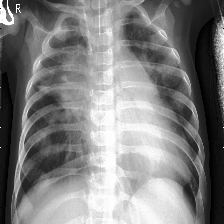

In [ ]:
# Je visualise une image pour m'assurer de la qualité
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
fig = px.imshow(patient_bacterial, color_continuous_scale='gray', title="Patient Pneumonie Bactérienne")
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.show()

In [ ]:
#Normalisation
patient_bacterial = np.array(patient_bacterial) / 255
print(f'patient_bacterial shape: {patient_bacterial.shape}')
patient_bacterial = patient_bacterial.reshape(-1,img_size,img_size,3)
print(f'patient_bacterial shape: {patient_bacterial.shape}')

patient_bacterial shape: (224, 224, 3)
patient_bacterial shape: (1, 224, 224, 3)


### Modèles multiclasses

In [ ]:
# MLP
print("Prédiction MLP Multiclasses")
print("------------------------------------- ")
print_pred_multi(mlp, patient_bacterial)

Prédiction MLP Multiclasses
------------------------------------- 
Probabilités :
  Bacterial.   Normal.    Viral. 
[[1. 0. 0.]]
------------------------------------- 
Prédiction de la classe :
Bacterial


In [ ]:
# CNN
print("Prédiction CNN Multiclasses")
print("------------------------------------- ")
print_pred_multi(cnn, patient_bacterial)

Prédiction CNN Multiclasses
------------------------------------- 
Probabilités :
  Bacterial.   Normal.    Viral. 
[[9.93564665e-01 1.00490526e-10 6.43525971e-03]]
------------------------------------- 
Prédiction de la classe :
Bacterial


In [ ]:
# InceptionV3
print("Prédiction InceptionV3 Multiclasses")
print("------------------------------------- ")
print_pred_multi(inceptionv3, patient_bacterial)

Prédiction InceptionV3 Multiclasses
------------------------------------- 
Probabilités :
  Bacterial.   Normal.    Viral. 
[[8.87824476e-01 5.48957265e-04 1.11626565e-01]]
------------------------------------- 
Prédiction de la classe :
Bacterial


In [ ]:
# VGG16
print("Prédiction InceptionV3 Multiclasses")
print("------------------------------------- ")
print_pred_multi(attention_vgg16, patient_bacterial)

Prédiction InceptionV3 Multiclasses
------------------------------------- 
Probabilités :
  Bacterial.   Normal.    Viral. 
[[0.8515157  0.001024   0.14746031]]
------------------------------------- 
Prédiction de la classe :
Bacterial


In [ ]:
# get the attention layer since it is the only one with a single output dim
for attn_layer in attention_vgg16.layers:
    c_shape = attn_layer.get_output_shape_at(0)
    if len(c_shape)==4:
        if c_shape[-1]==1:
            print(attn_layer)
            break

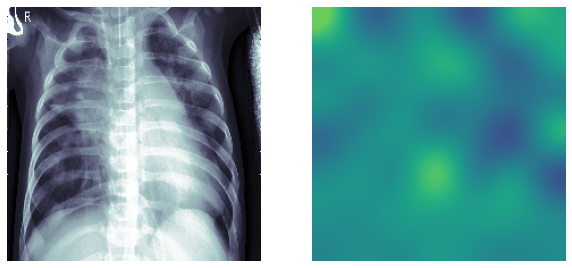

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10, 10))
[c_ax.axis('off') for c_ax in m_axs.flatten()]

attn_img = attn_func([patient_bacterial, 0])[0]
ax[0].imshow(patient_bacterial[0,:,:,0], cmap = 'bone')
ax[0].axis('off')
ax[1].imshow(attn_img[0, :, :, 0], cmap = 'viridis', 
                   vmin = 0, vmax = 1, 
                   interpolation = 'lanczos')
ax[1].axis('off')


fig.savefig('attention_map.png', dpi = 300)

### Modèles binaires 

In [ ]:
# MLP
print("Prédiction MLP Binaire")
print("------------------------------------- ")
print_pred_binaire(mlp_b, patient_bacterial)
print("------------------------------------- ")
print("------------------------------------- ")
print_pred_binaire_pneu(mlp_bp, patient_bacterial)

Prédiction MLP Binaire
------------------------------------- 
Probabilités :
  Normal.         Pneumonie. 
[[0. 1.]]
------------------------------------- 
Prédiction de la classe :
Pneumonie
------------------------------------- 
------------------------------------- 
Probabilités :
  Bactérienne.     Virale. 
[[1. 0.]]
------------------------------------- 
Prédiction de la classe :
Bactérienne


In [ ]:
# CNN
print("Prédiction CNN Binaire")
print("------------------------------------- ")
print_pred_binaire(cnn_b, patient_bacterial)
print("------------------------------------- ")
print("------------------------------------- ")
print_pred_binaire_pneu(cnn_bp, patient_bacterial)

Prédiction CNN Binaire
------------------------------------- 
Probabilités :
  Normal.         Pneumonie. 
[[2.3181335e-09 1.0000000e+00]]
------------------------------------- 
Prédiction de la classe :
Pneumonie
------------------------------------- 
------------------------------------- 
Probabilités :
  Bactérienne.     Virale. 
[[0.9756056  0.01021881]]
------------------------------------- 
Prédiction de la classe :
Bactérienne


In [ ]:
# InceptionV3
print("Prédiction InceptionV3 Binaire")
print("------------------------------------- ")
print_pred_binaire(inceptionv3_b, patient_bacterial)
print("------------------------------------- ")
print("------------------------------------- ")
print_pred_binaire_pneu(inceptionv3_bp, patient_bacterial)

Prédiction InceptionV3 Binaire
------------------------------------- 
Probabilités :
  Normal.         Pneumonie. 
[[9.408323e-04 9.986755e-01]]
------------------------------------- 
Prédiction de la classe :
Pneumonie
------------------------------------- 
------------------------------------- 
Probabilités :
  Bactérienne.     Virale. 
[[0.87120825 0.13174944]]
------------------------------------- 
Prédiction de la classe :
Bactérienne


In [ ]:
# VGG16
print("Prédiction VGG16 Binaire")
print("------------------------------------- ")
print_pred_binaire(vgg16_b, patient_bacterial)
print("------------------------------------- ")
print("------------------------------------- ")
print_pred_binaire_pneu(vgg16_bp, patient_bacterial)

Prédiction VGG16 Binaire
------------------------------------- 
Probabilités :
  Normal.         Pneumonie. 
[[0.00429404 0.9959024 ]]
------------------------------------- 
Prédiction de la classe :
Pneumonie
------------------------------------- 
------------------------------------- 
Probabilités :
  Bactérienne.     Virale. 
[[0.8739298  0.12759775]]
------------------------------------- 
Prédiction de la classe :
Bactérienne


# 3eme patient - Normal

### Données

In [ ]:
### Shape pour MLP

directory = '/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/test/NORMAL/IM-0029-0001.jpeg'
img_arr = cv2.imread(directory, cv2.IMREAD_GRAYSCALE) 
resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Remodeler à la taille souhaitée
patient_normal = cv2.equalizeHist(resized_arr)
patient_normal = patient_normal.reshape(-1, img_size*img_size).astype('float32')
print('patient_normal float32 shape:', patient_normal.shape)

patient_normal float32 shape: (1, 50176)


In [ ]:
### Shape pour CNN

directory = '/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/test/NORMAL/IM-0029-0001.jpeg'
img_arr = cv2.imread(directory, cv2.IMREAD_GRAYSCALE) # Les images sont en Gray scale
resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Remodeler à la taille souhaitée
backtorgb = cv2.cvtColor(resized_arr,cv2.COLOR_GRAY2RGB) # Conversion en RGB
r_image, g_image, b_image = cv2.split(backtorgb) # Séparation des 3 canaux RGB
r_image_eq = cv2.equalizeHist(r_image) # égalisation d'histogramme pour augmenter le contraste
g_image_eq = cv2.equalizeHist(g_image)
b_image_eq = cv2.equalizeHist(b_image)
patient_normal = cv2.merge((r_image_eq, g_image_eq, b_image_eq)) # Assemblage des 3 canaux RGB


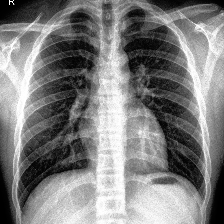

In [ ]:
# Je visualise une image pour m'assurer de la qualité
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
fig = px.imshow(patient_normal, color_continuous_scale='gray', title="Patient Normal")
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.show()

In [ ]:
# Normalisation
patient_normal = np.array(patient_normal) / 255
print(f'patient_normal shape: {patient_normal.shape}')
patient_normal = patient_normal.reshape(-1,img_size,img_size,3)
print(f'patient_normal shape: {patient_normal.shape}')

patient_normal shape: (224, 224, 3)
patient_normal shape: (1, 224, 224, 3)


### Modèles multiclasses

In [ ]:
# MLP
print("Prédiction MLP Multiclasses")
print("------------------------------------- ")
print_pred_multi(mlp, patient_normal)

Prédiction MLP Multiclasses
------------------------------------- 
Probabilités :
  Bacterial.   Normal.    Viral. 
[[0. 1. 0.]]
------------------------------------- 
Prédiction de la classe :
Normal


In [ ]:
# CNN
print("Prédiction CNN Multiclasses")
print("------------------------------------- ")
print_pred_multi(cnn, patient_normal)

Prédiction CNN Multiclasses
------------------------------------- 
Probabilités :
  Bacterial.   Normal.    Viral. 
[[2.094204e-05 9.927208e-01 7.258274e-03]]
------------------------------------- 
Prédiction de la classe :
Normal


In [ ]:
# InceptionV3
print("Prédiction InceptionV3 Multiclasses")
print("------------------------------------- ")
print_pred_multi(inceptionv3, patient_normal)

Prédiction InceptionV3 Multiclasses
------------------------------------- 
Probabilités :
  Bacterial.   Normal.    Viral. 
[[0.05039614 0.42495084 0.524653  ]]
------------------------------------- 
Prédiction de la classe :
Viral


In [ ]:
# VGG16
print("Prédiction InceptionV3 Multiclasses")
print("------------------------------------- ")
print_pred_multi(attention_vgg16, patient_viral)

Prédiction InceptionV3 Multiclasses
------------------------------------- 
Probabilités :
  Bacterial.   Normal.    Viral. 
[[0.02091078 0.9204952  0.05859406]]
------------------------------------- 
Prédiction de la classe :
Normal


In [ ]:
# get the attention layer since it is the only one with a single output dim
for attn_layer in attention_vgg16.layers:
    c_shape = attn_layer.get_output_shape_at(0)
    if len(c_shape)==4:
        if c_shape[-1]==1:
            print(attn_layer)
            break

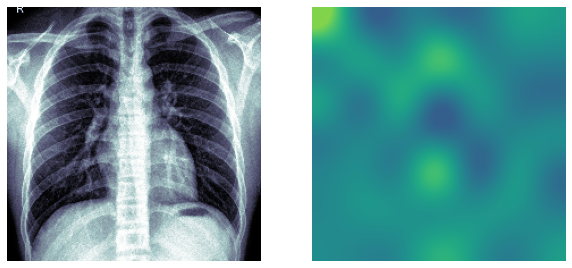

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10, 10))
[c_ax.axis('off') for c_ax in m_axs.flatten()]

attn_img = attn_func([patient_normal, 0])[0]
ax[0].imshow(patient_normal[0,:,:,0], cmap = 'bone')
ax[0].axis('off')
ax[1].imshow(attn_img[0, :, :, 0], cmap = 'viridis', 
                   vmin = 0, vmax = 1, 
                   interpolation = 'lanczos')
ax[1].axis('off')


fig.savefig('attention_map.png', dpi = 300)

### Modèles binaires

In [ ]:
# MLP
print("Prédiction MLP Binaire")
print("------------------------------------- ")
print_pred_binaire(mlp_b, patient_normal)

Prédiction MLP Binaire
------------------------------------- 
Probabilités :
  Normal.         Pneumonie. 
[[1. 0.]]
------------------------------------- 
Prédiction de la classe :
Normal


In [ ]:
# CNN
print("Prédiction CNN Binaire")
print("------------------------------------- ")
print_pred_binaire(cnn_b, patient_normal)


Prédiction CNN Binaire
------------------------------------- 
Probabilités :
  Normal.         Pneumonie. 
[[9.9960083e-01 2.2995472e-04]]
------------------------------------- 
Prédiction de la classe :
Normal


In [ ]:
# InceptionV3
print("Prédiction InceptionV3 Binaire")
print("------------------------------------- ")
print_pred_binaire(inceptionv3_b, patient_normal)


Prédiction InceptionV3 Binaire
------------------------------------- 
Probabilités :
  Normal.         Pneumonie. 
[[0.67572975 0.33107316]]
------------------------------------- 
Prédiction de la classe :
Normal


In [ ]:
# VGG16
print("Prédiction VGG16 Binaire")
print("------------------------------------- ")
print_pred_binaire(vgg16_b, patient_normal)


Prédiction VGG16 Binaire
------------------------------------- 
Probabilités :
  Normal.         Pneumonie. 
[[0.9881674  0.01169974]]
------------------------------------- 
Prédiction de la classe :
Normal
